## __DQLab Challenge : Pengembangan Hotel Search Engine untuk DQLab Travel__

by Imam Aris Munandar

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load data hotel and review hotel use read_excel
hotel_df = pd.read_excel('data_hotel.xlsx')
review_df = pd.read_excel('review_hotel.xlsx')

In [4]:
# cek top 5 dataframe in data_hotel
hotel_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
0,h0001,Midtown Residence Marvell City Surabaya,NaN,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000


In [5]:
# cek top 5 dataframe in review_hotel
review_df.head()

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good


In [6]:
# cek bottom bracket dataframe in data_hotel
hotel_df.tail()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
1194,h1195,Restu Hotel Yogyakarta,Akomodasi yang nyaman dan modern di Yogyakarta...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Batikan No. 7, Pandeyan, Kec. Umbulharjo, ...",150000.000000
1195,h1196,Oryza Hotel Malioboro,Ideal accommodation options in the Malioboro a...,Daerah Istimewa Yogyakarta,Jogja,"Sosrowijayan St No.49-51, Sosromenduran, Gedon...",180000.000000
1196,h1197,Hotel Asri Graha Yogyakarta,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Veteran No. 184 A, Umbulharjo, Yogyakarta,...",262500.000000
1197,h1198,Tasneem Convention Hotel Yogyakarta,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Kawasan Mandira Baruga, Jl. Brigjen Katamso, K...",391666.666667
1198,h1199,Pesonna Hotel Tugu Yogyakarta,Penginapan Yang Tenang Dan Nyaman di dekat Tug...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Diponegoro No.99, Bumijo, Jetis, Yogyakart...",338074.666667


In [7]:
# cek bottom bracket dataframe in review_hotel
review_df.tail()

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
4301,b4302,10-08-2019,h0791,The Luxton Bandung,1,2,2,3.6,Hotel kurang perawatan dan membosankan
4302,b4303,25-07-2019,h0791,The Luxton Bandung,2,2,2,6.8,Kurang perawatan
4303,b4304,08-07-2019,h0791,The Luxton Bandung,2,2,2,10.0,Mantul
4304,b4305,15-04-2019,h0791,The Luxton Bandung,3,2,2,3.6,Kecewa
4305,b4306,09-04-2019,h0791,The Luxton Bandung,2,1,1,8.8,Semoga lebih baik dan sukses


### __EDA (Exploratory Data Analysis)__
disini saya melakukan eksplorasi data terlebih dahulu untuk menentukan data bersih dan memudahkan mengolah data dalam membuat model kedepannya

#### Mengecek Data Type dari masing-masing dataframe

In [8]:
hotel_df.dtypes

hotel_id              object
hotel_name            object
hotel_description     object
hotel_province        object
hotel_city            object
hotel_address         object
price_per_night      float64
dtype: object

In [9]:
review_df.dtypes

booking_id        object
booking_date      object
hotel_id          object
hotel_name        object
stay_duration      int64
adults             int64
children           int64
rating           float64
review            object
dtype: object

In [10]:
# mengecek informasi terkait provinsi lokasi hotel pada dataset
hotel_df['hotel_province'].value_counts()

DKI Jakarta                   312
Daerah Istimewa Yogyakarta    224
Jawa Barat                    214
Jawa Timur                    179
Jawa Tengah                   179
Sumatra Utara                  91
Name: hotel_province, dtype: int64

In [11]:
# mengecek informasi terkait rating yang diberikan customer
review_df['rating'].value_counts()

10.0    1091
9.6      507
9.2      462
8.0      459
8.8      370
8.4      347
7.6      241
7.2      156
6.8      127
6.0      106
6.4       97
5.6       72
5.2       59
4.8       53
4.4       32
2.0       30
4.0       29
3.6       27
3.2       17
2.8       15
2.4        9
Name: rating, dtype: int64

### __1. Data Cleansing__
data cleansing merupakan bagian dari EDA, yang berfungsi membersihkan data yang tidak penting (misalnya data yang memiliki value NULL, empty, dst)


##### Dropping and missing Value in DataFrame

In [12]:
# check data null
hotel_df.isnull().sum()

hotel_id               0
hotel_name             0
hotel_description    101
hotel_province         0
hotel_city             0
hotel_address          0
price_per_night        6
dtype: int64

In [13]:
# change data null description to unknown
hotel_df['hotel_description'] = hotel_df['hotel_description'].fillna('unknown')

In [14]:
# change data null description to unknown
hotel_df['price_per_night'] = hotel_df['price_per_night'].fillna(0)

In [15]:
# check lagi apakah sudah clean dari data null
hotel_df.isnull().sum()
# print(hotel_df.dtypes)

hotel_id             0
hotel_name           0
hotel_description    0
hotel_province       0
hotel_city           0
hotel_address        0
price_per_night      0
dtype: int64

In [16]:
# check data null
review_df.isnull().sum()

booking_id         0
booking_date       0
hotel_id         473
hotel_name         0
stay_duration      0
adults             0
children           0
rating             0
review             0
dtype: int64

In [17]:
# delete hotel id yang bernilai null
review_df = review_df.dropna()

In [18]:
# check lagi apakah sudah clean dari data null
review_df.isnull().sum()

booking_id       0
booking_date     0
hotel_id         0
hotel_name       0
stay_duration    0
adults           0
children         0
rating           0
review           0
dtype: int64

In [19]:
# melihat dimensi (column, row) dari data frame yang sudah dibuat
print(hotel_df.shape)
print(review_df.shape)

(1199, 7)
(3833, 9)


In [20]:
# mencari rata-rata rating tiap hotel
mean_rating = review_df[['hotel_id', 'rating']].groupby(['hotel_id']).mean().reset_index()

In [21]:
mean_rating.head()

,hotel_id,rating
0,h0001,9.20
1,h0002,8.32
2,h0003,8.76
3,h0004,8.52
4,h0005,8.04


### __2. Nilai Review__
Dataset __review_df__ bisa digunakan untuk mendapatkan jumlah __kapasitas kamar__ maksimal sehingga mendapatkan __service provider__ seperti apa yang disediakan oleh masing-masing hotel sehingga customer dengan leluasa melihat sebagus apa pelayanan hotel tersebut dan selain itu bisa digunakan oleh pihak perusahaan untuk mendapatkan rata-rata rating dari hotel mereka.


In [22]:
# total person masing-masing hotel setiap order
review_df['total_person_room'] = review_df['adults'] + review_df['children']

In [23]:
review_df.head()

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review,total_person_room
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay,3
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman,2
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit,3
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman,2
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good,3


In [24]:
# service provide dibagi standar room and deluxe room

list_hotel = mean_rating['hotel_id'].values.tolist()
max_person = []
service_provide = []

for i in list_hotel:
    m = review_df['total_person_room'].loc[review_df['hotel_id'] == i].max()
    max_person.append(m)
    if m < 3:
        service_provide.append('Standar Room')
    else:
            service_provide.append('Standar Room, Family Room')
            
data_service = {'hotel_id' : list_hotel,
       'max_person': max_person,
       'service_provide': service_provide}

In [25]:
person_df = pd.DataFrame(data_service).sort_values(by=['max_person'], ascending=False)
person_df.head()

,hotel_id,max_person,service_provide
204,h0554,4,"Standar Room, Family Room"
231,h0584,4,"Standar Room, Family Room"
253,h0607,4,"Standar Room, Family Room"
252,h0606,4,"Standar Room, Family Room"
251,h0604,4,"Standar Room, Family Room"


In [26]:
# merge tabel rata-rata rating setiap hotel dengan service provide
ratinghotel_df = pd.merge(mean_rating, person_df, on='hotel_id', how='left')
ratinghotel_df.head()

,hotel_id,rating,max_person,service_provide
0,h0001,9.20,3,"Standar Room, Family Room"
1,h0002,8.32,3,"Standar Room, Family Room"
2,h0003,8.76,3,"Standar Room, Family Room"
3,h0004,8.52,3,"Standar Room, Family Room"
4,h0005,8.04,3,"Standar Room, Family Room"


In [27]:
# menggabungkan semua dataframe yang sudah ada menjadi data yang sudah bersih
hotel_final = pd.merge(hotel_df, ratinghotel_df, on='hotel_id', how='left')
hotel_final.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,rating,max_person,service_provide
0,h0001,Midtown Residence Marvell City Surabaya,unknown,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667,9.20,3.0,"Standar Room, Family Room"
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000,8.32,3.0,"Standar Room, Family Room"
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000,8.76,3.0,"Standar Room, Family Room"
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333,8.52,3.0,"Standar Room, Family Room"
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000,8.04,3.0,"Standar Room, Family Room"


In [28]:
hotel_final.isnull().sum()

hotel_id               0
hotel_name             0
hotel_description      0
hotel_province         0
hotel_city             0
hotel_address          0
price_per_night        0
rating               791
max_person           791
service_provide      791
dtype: int64

In [29]:
hotel_final['rating'] = hotel_final['rating'].fillna(0)
# change data null description to unknown
# hotel_final['hotel_description'] = hotel_final['hotel_description'].fillna('unknown')
hotel_final['max_person'] = hotel_final['max_person'].fillna(2)
hotel_final['service_provide'] = hotel_final['service_provide'].fillna('Standar Room')

In [30]:
hotel_final.isnull().sum()

hotel_id             0
hotel_name           0
hotel_description    0
hotel_province       0
hotel_city           0
hotel_address        0
price_per_night      0
rating               0
max_person           0
service_provide      0
dtype: int64

In [31]:
hotel_final.columns

Index(['hotel_id', 'hotel_name', 'hotel_description', 'hotel_province',
       'hotel_city', 'hotel_address', 'price_per_night', 'rating',
       'max_person', 'service_provide'],
      dtype='object')

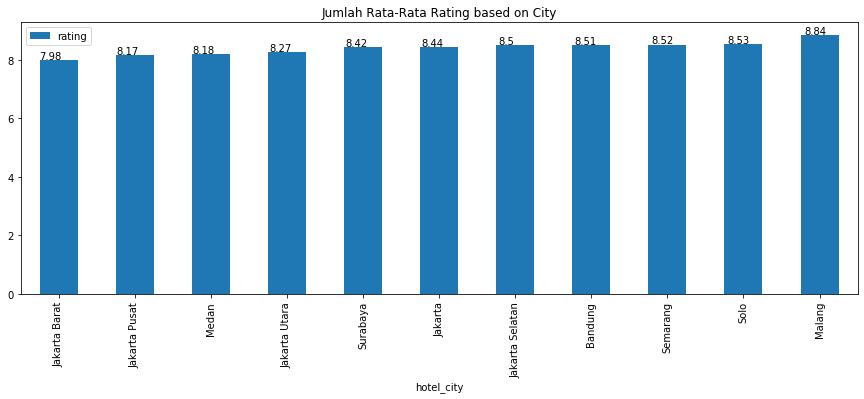

In [32]:
plt.rcParams["figure.figsize"] = [15,5]

df_rt = hotel_final[['hotel_city','rating']].loc[hotel_final['rating'] != 0].groupby(['hotel_city']).mean().reset_index().sort_values(by='rating')
df_rt['rating'] = round(df_rt['rating'],2)
ax = df_rt.plot(kind='bar',x='hotel_city',y='rating',title='Jumlah Rata-Rata Rating based on City')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.005, p.get_height()*1.005))

Dari grafik diatas dapat kita rangkumkan bahwa setiap kota memiliki rating yang tinggi diatas __7__, dengan rating paling tinggi berada di kota Malang (__8.84__) dan rating paling rendah di Jakarta Barat (__7.98__) hal ini membuktikan bahwa, customer sastification pada kota malang untuk menginal dihotel sangat lah tinggi, bisa dinilai dari beberapa aspek terhadap hotel-hotel yang ada di Malang tersebut

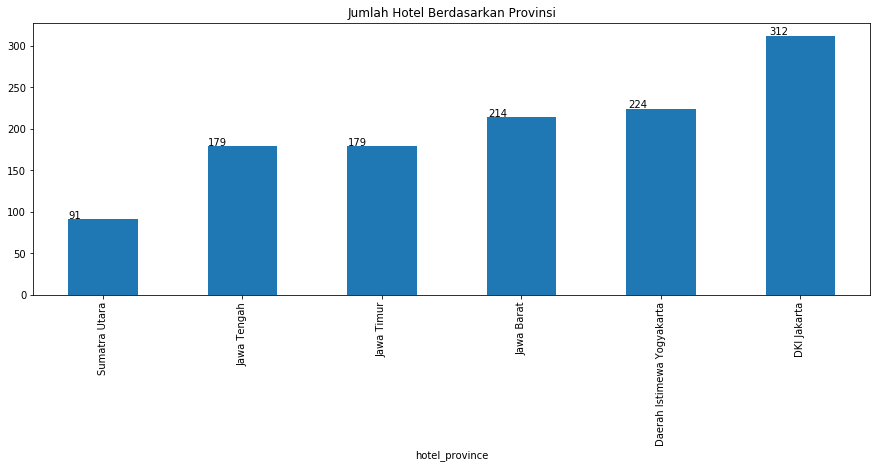

In [33]:
ax = hotel_final.groupby('hotel_province') ['hotel_name'].nunique().sort_values().plot(kind='bar',title='Jumlah Hotel Berdasarkan Provinsi')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Informasi berdasarkan jumlah pada data bahwa total hotel paling rendah ada di __Sumatera Utara__ dengan jumlah 91, sedangkan jumlah yang terbanyak ada pada provinsi __DKI Jakarta__

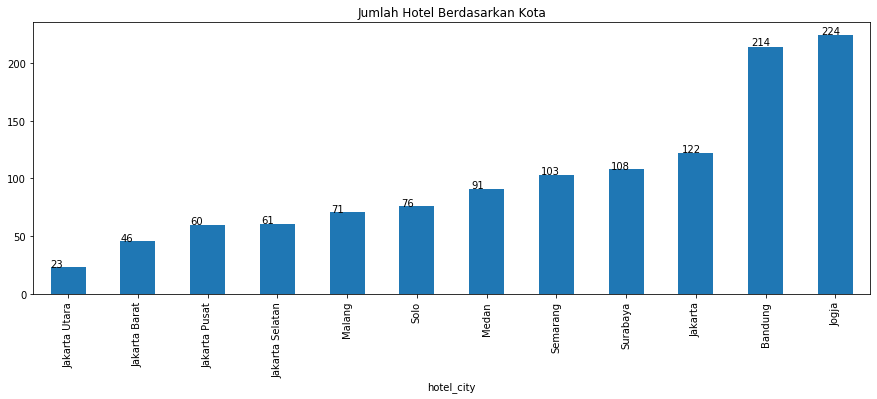

In [34]:
ax = hotel_final.groupby('hotel_city')['hotel_name'].nunique().sort_values().plot(kind='bar',title= 'Jumlah Hotel Berdasarkan Kota')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Dari Grafik diatas didapatkan informasi Jumlah Hotel Berdasarkan kota, paling banyak ada di kota Jogja dengan jumlah __448__ hotel
dan paling rendah ada di kota Jakarta Utara dengan jumlah __46__ hotel.

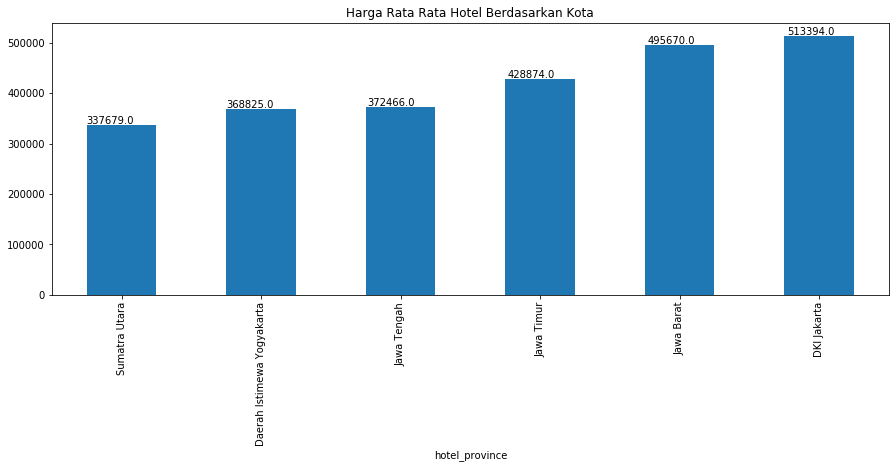

In [35]:
df_ht = hotel_final.groupby('hotel_province')['price_per_night'].mean().sort_values()
df_ht = round(df_ht)
ax = df_ht.plot(kind='bar',title='Harga Rata Rata Hotel Berdasarkan Kota')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Informasi yang didapat diatas bahwa rata-rata harga permalam kamar hotel yang paling tertinggi ada di __DKI Jakarta__ dengan harga __Rp. 513.994__ dan terendah ada di __Sumatera Utara__ dengan harga __Rp. 337.679__

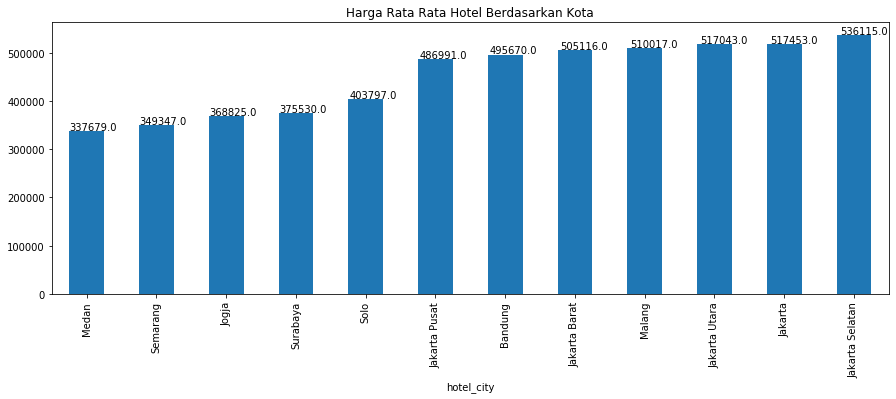

In [36]:
df_ht = hotel_final.groupby('hotel_city')['price_per_night'].mean().sort_values()
df_ht = round(df_ht)
ax = df_ht.plot(kind='bar',title='Harga Rata Rata Hotel Berdasarkan Kota')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


In [37]:
# mendapatkan tahun dari data review_hotel
review_df['year'] = pd.DatetimeIndex(review_df['booking_date']).year

In [38]:
df_year = pd.merge(review_df[['hotel_id','year']],hotel_final[['hotel_id','hotel_city']],on='hotel_id', how='left')
df_year = df_year.drop('hotel_id',axis=1)
df_year.head()

,year,hotel_city
0,2020,Surabaya
1,2020,Surabaya
2,2020,Surabaya
3,2020,Surabaya
4,2020,Surabaya


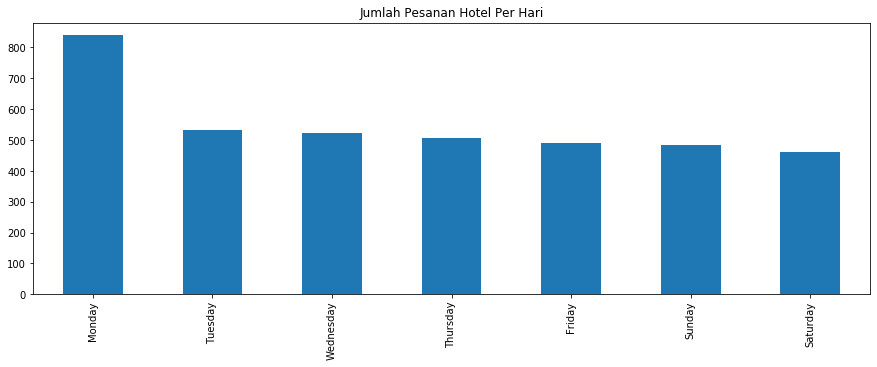

In [39]:
review_df['day'] = pd.DatetimeIndex(review_df['booking_date']).day_name()
review_df['day'].value_counts().plot(kind='bar',title='Jumlah Pesanan Hotel Per Hari')

Dari grafik diatas didapatkan informasi Jumlah pesanan hotel berdasarkan hari. Pesanan paling tinggi ada di hari Senin dan paling
rendah ada di hari __Sabtu__

__Case 1__
Sistem Rekomendasi berdasrkan service dan lokasi, Mendapatkan informasi hotel yang memiliki service Family Room di Jawa Timur Kota Surabaya

In [40]:
def hotel_recommender_1(service,province,city,top=5):
    result = hotel_final[hotel_final['service_provide'].str.contains(service)][(hotel_final['hotel_province'] == province) & (hotel_final['hotel_city'] == city)].copy()
    result = result.sort_values(by=['price_per_night','rating'],ascending=[True,False])
    result=result.drop('max_person',axis=1)
    result=result[:top]
    return(result)

In [41]:
hotel_recommender_1('Family Room','Jawa Timur','Surabaya')

C:\Users\imam.munandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,rating,service_provide
14,h0015,The Life Hotel Surabaya,"Akomodasi yang Ideal untuk Pebisnis, Wisatawan...",Jawa Timur,Surabaya,"Jl. Kusuma Bangsa No.41, Surabaya, Indonesia",151496.000000,7.96,"Standar Room, Family Room"
30,h0031,Hotel 88 Embong Malang,Memberikan Harga yang Murah dan Suasana Nyaman,Jawa Timur,Surabaya,"Jl. Embong Malang No.84, Surabaya",231033.333333,8.16,"Standar Room, Family Room"
39,h0040,Hotel 88 Kedungsari ( Kedungdoro ),Penginapan Yang Tenang Dan Nyaman di Tegalsari.,Jawa Timur,Surabaya,"Jl. Kedungsari No. 76 - 78, Tegalsari, Surabay...",236833.333333,7.76,"Standar Room, Family Room"
11,h0012,News Front One Hotel Surabaya,Rasakan keramahan kota Surabaya di News Hotel ...,Jawa Timur,Surabaya,"Jl. Pondok Maspion Blok S No. 1, Pepelegi, War...",239118.333333,7.48,"Standar Room, Family Room"
29,h0030,Front One Inn Sidoarjo,Penginapan Yang Tenang Dan Nyaman di Sidoarjo.,Jawa Timur,Surabaya,"Jl. Trunojoyo No. 41, Sidoarjo, Jawa Timur, In...",250000.000000,8.76,"Standar Room, Family Room"


### 4. Penggunaan Fitur untuk Model
Fitur yang akan digunakan untuk model rekomendasi ini yaitu hotel_name, hotel city, hotel_province dan hotel_prediction
Alasannya adalah karena informasi terkait pencarian hotel terdapat pada fitur diatas.

__Case 2__
Sistem Rekomendasi berdasarkan kata kunci, mencari hotel dengan yang terletak di provinsi DI Yogyakarta kota Jogja dan hotel apapun yang relevan dengan Hotel Tentrem Jogja

In [42]:
# import library nltk untuk stopwords agar bisa menggunakan bahasa indonesia
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# library CountVectorizer untuk mengubah text menjadi vektor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imam.munandar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
def hotel_recommender_2(keyword,province,city):
    data_hotel_m = hotel_final.loc[(hotel_final['hotel_province'] == province) & (hotel_final['hotel_city'] == city)].copy()
    base_df = data_hotel_m.copy()
    
    df2 = pd.DataFrame({'hotel_name':[keyword]})
    
    if keyword not in base_df['hotel_name'].unique():
        base_df = base_df.append(df2, ignore_index=True)
        base_df = base_df.fillna('unknown')
    indices = pd.Series(base_df.index, index=base_df['hotel_name']).drop_duplicates()
    x = len(base_df['hotel_name'])
    i = 0
    h_name = []
    h_des = []
    h_province =[]
    while i < x:
        c = base_df['hotel_name'][i].split()
        d = base_df['hotel_description'][i].split()
        e = base_df['hotel_province'][i].split()
        h_name.append(c)
        h_des.append(d)
        h_province.append(e)
        i+=1
    
    base_df['hotel_name'] = h_name
    base_df['hotel_description'] = h_des
    base_df['hotel_province'] = h_province
    
    def soup_feature(x):
        return ' '.join(x['hotel_name']) + ' ' +' '.join(x['hotel_province'])+' '+' '.join(x['hotel_description'])
    
    base_df['soup'] = base_df.apply(soup_feature,axis=1)
    
    sw = stopwords.words('indonesian')
    sw.extend(stopwords.words('english'))
    
    count = CountVectorizer(stop_words=sw)
    count_matrix = count.fit_transform(base_df['soup'])
    
    from sklearn.metrics.pairwise import cosine_similarity
    consine_sim = cosine_similarity(count_matrix, count_matrix)
    
    try:
        idx = indices[keyword]
        sim_scores=list(enumerate(consine_sim[idx]))
        sim_scores = sim_scores[1:6]
        hotel_indices = [i[0] for i in sim_scores]
        
        df_result = data_hotel_m.iloc[hotel_indices]
        return df_result
    except:
        return 'Data tidak ditemukan'

In [44]:
hotel_recommender_2('Santika Hotels', 'Daerah Istimewa Yogyakarta', 'Jogja')

C:\Users\imam.munandar\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,rating,max_person,service_provide
976,h0977,THE 1O1 Yogyakarta Tugu,Jadilah yang pertama untuk mengalami ikon baru...,Daerah Istimewa Yogyakarta,Jogja,"Jl.Margoutomo No.103 (Mangkubumi), Tugu, Yogya...",614316.333333,0.0,2.0,Standar Room
977,h0978,Best City Hotel,"Sebuah penginapan budget yang strategis, nyama...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Tentara Pelajar No. 44, Jatis, Yogyakarta,...",138325.333333,0.0,2.0,Standar Room
978,h0979,SigNature Jogja Hotel,"Penginapan Yang Tenang Dan Nyaman di Mlati, Sl...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Monjali, Sub Jl. Sidodadi No. 88 Rt. 01 Rw...",129999.000000,0.0,2.0,Standar Room
979,h0980,Hotel Jentra Malioboro,Pilihan yang sempurna untuk liburan bersejarah...,Daerah Istimewa Yogyakarta,Jogja,"Jl.Dagen 85, Malioboro, Yogyakarta, Indonesia",278050.000000,0.0,2.0,Standar Room
980,h0981,Yellow Star Ambarukmo Hotel,Penginapan Yang Tenang Dan Nyaman Di Yogyakart...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Laksda Adisucipto No. 23, Ambarukmo, Slema...",235248.500000,0.0,2.0,Standar Room


### Case 3
Sistem Rekomendasi berdasarkan kata kunci, mencari hotel dengan yang terletak di provinsi DI Yogyakarta kota Jogja dan hotel
apapun yang relevan dengan Santika Hotels


In [45]:
hotel_recommender_2('Santika Hotels','Daerah Istimewa Yogyakarta','Jogja')

C:\Users\imam.munandar\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,rating,max_person,service_provide
976,h0977,THE 1O1 Yogyakarta Tugu,Jadilah yang pertama untuk mengalami ikon baru...,Daerah Istimewa Yogyakarta,Jogja,"Jl.Margoutomo No.103 (Mangkubumi), Tugu, Yogya...",614316.333333,0.0,2.0,Standar Room
977,h0978,Best City Hotel,"Sebuah penginapan budget yang strategis, nyama...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Tentara Pelajar No. 44, Jatis, Yogyakarta,...",138325.333333,0.0,2.0,Standar Room
978,h0979,SigNature Jogja Hotel,"Penginapan Yang Tenang Dan Nyaman di Mlati, Sl...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Monjali, Sub Jl. Sidodadi No. 88 Rt. 01 Rw...",129999.000000,0.0,2.0,Standar Room
979,h0980,Hotel Jentra Malioboro,Pilihan yang sempurna untuk liburan bersejarah...,Daerah Istimewa Yogyakarta,Jogja,"Jl.Dagen 85, Malioboro, Yogyakarta, Indonesia",278050.000000,0.0,2.0,Standar Room
980,h0981,Yellow Star Ambarukmo Hotel,Penginapan Yang Tenang Dan Nyaman Di Yogyakart...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Laksda Adisucipto No. 23, Ambarukmo, Slema...",235248.500000,0.0,2.0,Standar Room


In [46]:
def hotel_recommender_3(keyword,province, city):
    data_hotel_m = hotel_final.loc[(hotel_final['hotel_province'] == province) & (hotel_final['hotel_city'] == city)].copy()
    
    base_df = data_hotel_m.copy()

    df2 = pd.DataFrame({'hotel_name':[keyword]})
    
    if keyword not in base_df['hotel_name'].unique():
        base_df = base_df.append(df2, ignore_index=True)
        base_df = base_df.fillna('unknown')
        data_hotel_m = data_hotel_m.append(df2, ignore_index=True)
        data_hotel_m = data_hotel_m.fillna('unknown')
    # indices = pd.Series(base_df.index, index=base_df['hotel_name']).drop_duplicates()
    x = len(base_df['hotel_name'])
    i = 0
    h_name = []
    h_des = []
    h_province =[]
    while i < x:
        c = base_df['hotel_name'][i].split()
        d = base_df['hotel_description'][i].split()
        e = base_df['hotel_province'][i].split()
        h_name.append(c)
        h_des.append(d)
        h_province.append(e)
        i+=1
    
    base_df['hotel_name'] = h_name
    base_df['hotel_description'] = h_des
    base_df['hotel_province'] = h_province
    
    def soup_feature(x):
        return ' '.join(x['hotel_name']) + ' ' +' '.join(x['hotel_province'])+' '+' '.join(x['hotel_description'])
    
    base_df['soup'] = base_df.apply(soup_feature,axis=1)
    
    def get_jaccard_sim(str1,str2):
        a = set(str1.split())
        b = set(str1.split())
        c = a.intersection(b)
        return float(len(c)) / (len(a) + len(b) - len(c))
    score=[]
    for i in base_df['soup']:
        key = base_df['soup'].tail(1).values[0]
        score.append(get_jaccard_sim(i,key))
    base_df['score'] = score
    data_hotel_m['score'] = score
    base_df = base_df.sort_values(by='score', ascending=False)
    data_hotel_m = data_hotel_m.sort_values(by='score',ascending=False)
    return data_hotel_m.drop('score',axis=1).iloc[1:6]

In [47]:
hotel_recommender_3('Santika Hotels','Daerah Istimewa Yogyakarta','Jogja')

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,rating,max_person,service_provide
113,h1089,Hotel Matahari Jogja,Hotel Yang Nyaman di Tengah Jogjakarta dan Par...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Parangtritis KM. 1 No. 123, Yogyakarta, Ja...",178607,0,2,Standar Room
143,h1119,Arrayan Malioboro Syariah,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Bhayangkara No. 13, Malioboro, Yogyakarta,...",685999,0,2,Standar Room
144,h1120,Eastparc Hotel Yogyakarta,Eastparc Hotel Yogyakarta adalah hotel pilihan...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Laksda Adisucipto Km 6,5 Seturan, Yogyakar...",931482,0,2,Standar Room
145,h1121,Indoluxe Hotel Yogyakarta,Hotel baru yang mewah dengan konsep baru di Jo...,Daerah Istimewa Yogyakarta,Jogja,Jl Palagan Tentara Pelajar No 106 Yogyakarta,690548,0,2,Standar Room
146,h1122,Metro Malioboro Living,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Ronodigdayan No. 16, Bausasran, Danurejan,...",674000,0,2,Standar Room


#### 6. Evalution Model

Evaluasi menurut saya perlu dilakukan survey customer sastification dan kepuasan customer secara manual seperti google docs. Untuk mengetahui sistem ini apakah dibutuhkan customer atau tidak. jawaban dari user akan membantu melakukan evaluasi model apakah model yang sudah dibuat berguna bagi user terkait. 

Untuk survey bisa dilakukan dengan rumus slovin untuk menentukan populasi survey. Dari data review rating dengan total 4306, maka dengan rumus slovin digunakan margin of error 5%. Saya menggunakan 95% dari populasi agar data lebih akurat. maka survey dilakukan sebanyak sekitar kurang lebih 39-40 sample

### Untuk meningkatkan sistem rekomendasi

Bisa dilakukan jika mendapatkan data pribadi user saat ini, dengan data user tersebut kita dapat melakukan analisa terhadap kebiasaan customer masing-masing terhadap pemesanan hotel dan kebiasaan memesan kamar seperti apa yang mereka lakukan.

In [ ]:
# list environment yang digunakan
conda list